In [0]:
import numpy as np
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
#For CIFAR100 coarse labels = superclass,Fine labels= subclass

(X_train_full, y_train_full), (X_test, y_test) = cifar100.load_data('fine')
# Take only indexes that we are interested in
indices_train = np.where( (y_train_full == 84) | (y_train_full == 5) | (y_train_full == 20)|(y_train_full == 25)|(y_train_full == 94)|(y_train_full == 6)|(y_train_full == 7)|(y_train_full == 14)|(y_train_full == 18)|(y_train_full == 24))[0]
indices_test = np.where((y_test == 84) | (y_test == 5) | (y_test == 20)|(y_test == 25)|(y_test == 94)|(y_test == 6)|(y_test == 7)|(y_test == 14)|(y_test == 18)|(y_test == 24))[0]
# Hold 10 subclass labels
y_train_full = np.array(y_train_full[indices_train])
y_test = np.array(y_test[indices_test])
# Hold 10 subclass train- and test-data
X_train_full = X_train_full[indices_train]
X_test = X_test[indices_test]

# Prepare one-hot encoding
y_train_full[np.array(y_train_full==84)]=0 #table
y_train_full[np.array(y_train_full==5)]=1  #bed
y_train_full[np.array(y_train_full==20)]=2 #chair
y_train_full[np.array(y_train_full==25)]=3  #couch
y_train_full[np.array(y_train_full==94)]=4  #wardrobe
y_train_full[np.array(y_train_full==6)]=5  #bee
y_train_full[np.array(y_train_full==7)]=6  #beetle
y_train_full[np.array(y_train_full==14)]=7 #butterfly
y_train_full[np.array(y_train_full==18)]=8 #caterpillar
y_train_full[np.array(y_train_full==24)]=9 #cockroach

y_test[np.array(y_test==84)]=0
y_test[np.array(y_test==5)]=1 
y_test[np.array(y_test==20)]=2
y_test[np.array(y_test==25)]=3 
y_test[np.array(y_test==94)]=4
y_test[np.array(y_test==6)]=5 
y_test[np.array(y_test==7)]=6
y_test[np.array(y_test==14)]=7 
y_test[np.array(y_test==18)]=8
y_test[np.array(y_test==24)]=9 

# Convert class labels to one-hot labels
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

#from sklearn.preprocessing import MinMaxScaler

# train,test to float type
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

# Normalize to [0,1]
X_train_full /= 255
X_test /= 255

# Split train set for validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.20,stratify=y_train_full)

In [0]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(X_train)


In [0]:
# CNN MODEL STRUCTURE FOR FINE CLASSES

model = Sequential()
# Add first cnn layer with batch normalization and activation elu
#lecun_uniform
model.add(Convolution2D(filters=32,kernel_size=3,data_format="channels_last",input_shape=(32, 32, 3),strides=1,padding="valid",kernel_initializer="lecun_uniform",name="conv1", use_bias=False))
#model.add(Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",kernel_initializer="lecun_uniform",name="convadd", use_bias=False))

model.add(BatchNormalization())
model.add(Activation("elu"))

# Add first max-pooling
model.add(MaxPooling2D(pool_size=2,name="pool1"))

# Add first dropout
#model.add(Dropout(rate=0.2,name="h1_drop"))
# Add second cnn layer with batch normalization and activation elu
model.add(Convolution2D(filters=32,kernel_size=3,strides=1,padding="valid",kernel_initializer="lecun_uniform",name="conv2", use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=2,name="pool2"))
model.add(Dropout(rate=0.2,name="drop1"))

# Add third cnn layer with batch normalization and activation elu
model.add(Convolution2D(filters=64,kernel_size=3,strides=1,padding="valid",kernel_initializer="lecun_uniform",name="conv3",use_bias=False))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(AveragePooling2D(pool_size=2,name="pool3"))
#model.add(Dropout(rate=0.2,name="drop2"))

# flatten layer
model.add(Flatten())
# Add fully connected dense layer
model.add(Dense(units=512,activation='elu',name="dense1"))
#model.add(Dropout(rate=0.1,name="drop3"))
# Add fully connected output layer
model.add(Dense(units=10,activation='softmax',name="output"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 32)        864       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 32)        9216      
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 13, 13, 32)        0         
__________

Epoch 1/15
2000/2000 [==============================] - 130s 65ms/step - loss: 0.0605 - acc: 0.5351 - val_loss: 0.0543 - val_acc: 0.5940

Epoch 00001: val_loss improved from inf to 0.05433, saving model to model_best.h5
Epoch 2/15
2000/2000 [==============================] - 127s 63ms/step - loss: 0.0504 - acc: 0.6280 - val_loss: 0.0504 - val_acc: 0.6210

Epoch 00002: val_loss improved from 0.05433 to 0.05039, saving model to model_best.h5
Epoch 3/15
2000/2000 [==============================] - 127s 64ms/step - loss: 0.0454 - acc: 0.6695 - val_loss: 0.0474 - val_acc: 0.6380

Epoch 00003: val_loss improved from 0.05039 to 0.04745, saving model to model_best.h5
Epoch 4/15
2000/2000 [==============================] - 127s 63ms/step - loss: 0.0418 - acc: 0.7004 - val_loss: 0.0459 - val_acc: 0.6580

Epoch 00004: val_loss improved from 0.04745 to 0.04590, saving model to model_best.h5

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 5/15
2000/2000 [=====

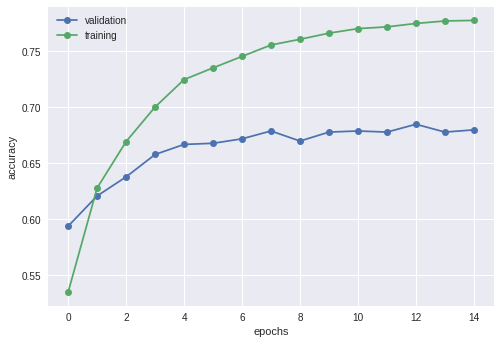

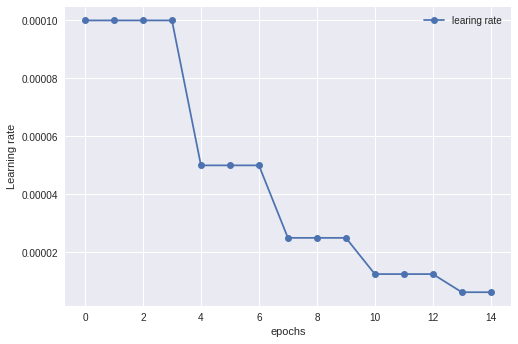

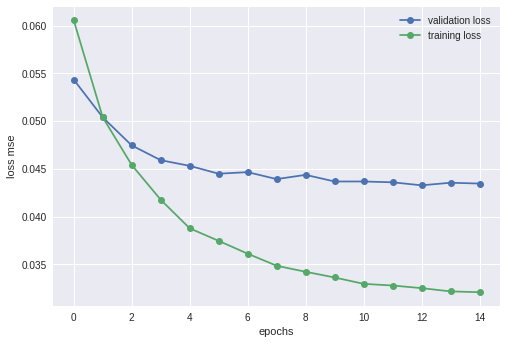

In [0]:
# COMPILE MODEL AND GET RESULTS
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau,CSVLogger,LearningRateScheduler
import keras.backend as K

import time

class TimeHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.start_time = time.time()
  def on_train_end(self, logs={}):
    self.result=(time.time()-self.start_time)
    print("Training time= ",self.result)
     
time_history  = TimeHistory()

# Define optimizer
#opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
optim = keras.optimizers.Adam(lr=0.0001,decay=1e-6)
#optim = keras.optimizers.SGD (lr=0.001,decay=1e-6,momentum=0.9,nesterov=True)
batch_size=100
# isws thelei loss='mean_squared_error'  loss='categorical_crossentropy'
model.compile(loss='mean_squared_error', optimizer=optim , metrics=['accuracy'])

# Define callbacks
checkpoint_callback = ModelCheckpoint('model_best.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping_callback = EarlyStopping(monitor='loss', min_delta=0.0005, patience=7, verbose=1, mode='auto')
reduce_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto', min_delta=0.05, cooldown=0, min_lr=1e-10)
csv_logger = CSVLogger('training.log')

#disabled finally
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lr = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
  return lr

# Define custom callback
class lr_history(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.lr = []
    def on_epoch_begin(self, batch, logs={}):
      self.lr.append(K.eval(self.model.optimizer.lr))
      #print(K.eval(self.model.optimizer.lr))

#lr = LearningRateScheduler(step_decay)
learn_history =lr_history()
cb =[early_stopping_callback,checkpoint_callback,reduce_plateau,csv_logger,learn_history,time_history]

results = model.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size),\
                    steps_per_epoch=2000,epochs=15,\
                    verbose=1,validation_data=(X_validation,y_validation),callbacks = cb,shuffle=True)

#Save model to disk
model_fine_json = model.to_json()
with open('model_fine.json', 'w') as json_file:
    json_file.write(model_fine_json)
model.save_weights('model_fine.h5') 
 
# Test accuracy in test set
scores = model.evaluate(X_test, y_test,batch_size=batch_size, verbose=1)

print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

# Plot training and validation accuracy per epoch
plt.plot(results.epoch,results.history['val_acc'],'-o',label='validation')
plt.plot(results.epoch,results.history['acc'],'-o',label='training')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()


# Plot training and validation lr per epoch
plt.plot(results.epoch,learn_history.lr,'-o',label='learing rate')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('Learning rate')
plt.grid(True)
plt.show()

# Plot training loss and validation loss per epoch
plt.plot(results.epoch,results.history['val_loss'],'-o',label='validation loss')
plt.plot(results.epoch,results.history['loss'],'-o',label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss mse')
plt.grid(True)
plt.show()

In [0]:
learn_history
print((time_history.result))

1881.2118599414825


In [0]:
!cat training.log

epoch,acc,loss,lr,val_acc,val_loss
0,0.5350599980279803,0.06053513157367706,1e-04,0.5939999938011169,0.05433494113385677
1,0.628045000180602,0.050391371285542844,1e-04,0.6210000038146972,0.05038914792239666
2,0.6695300013124943,0.04540380395203829,1e-04,0.6379999876022339,0.04744857996702194
3,0.7003900017142296,0.041762368668802084,1e-04,0.6579999983310699,0.04590272195637226
4,0.7248850010633469,0.03877104246709496,5e-05,0.6670000076293945,0.045310066640377046
5,0.7353300011754036,0.03745519636478275,5e-05,0.6679999947547912,0.04448566883802414
6,0.745580000013113,0.03611521850898862,5e-05,0.6719999969005584,0.04465114548802376
7,0.7557699994444848,0.03485084357019514,2.5e-05,0.6790000021457672,0.043923847004771234
8,0.7608449994921684,0.03422038625366986,2.5e-05,0.6700000047683716,0.0443672850728035
9,0.7663249985873699,0.033622829783707855,2.5e-05,0.6779999911785126,0.04367182739078999
10,0.7703699979484081,0.03295849921461195,1.25e-05,0.6790000021457672,0.043673042207956314
11,0.7

0.704


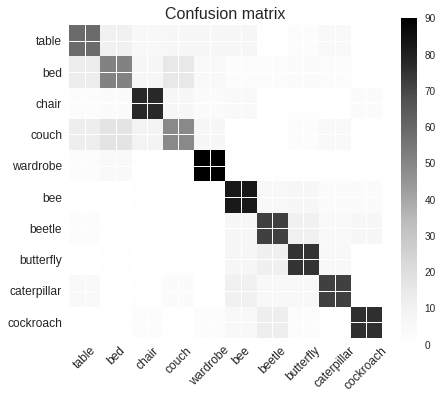

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

cifar_classes = ["table", "bed","chair", "couch","wardrobe", "bee","beetle", "butterfly","caterpillar", "cockroach"]

y_pred = model.predict(X_test, batch_size=batch_size)

#print(y_test.shape)
y_pred2 = np.argmax(y_pred,axis=1)
#print(y_pred.shape)
#y_test2=y_test
y_test2 = np.argmax(y_test,axis=1)
accuracy = (len(y_test2) - np.count_nonzero(y_pred2 - y_test2))/len(y_test2)
print(accuracy)

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test2,y_pred2))
plt.xticks(np.arange(10), cifar_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar_classes, fontsize=12)
plt.colorbar()
plt.show()
#print("Test accuracy:", accuracy_score(y_test, y_pred))


In [0]:
cm =confusion_matrix(y_test2,y_pred2)
print(cm)
acc_per_label = cm.diagonal()/cm.sum(axis=1)
acc_per_label_final = [cifar_classes[i]+ " = "+str(acc_per_label[i]) for i in range(0,10)]
print(acc_per_label_final)

[[59 10  5  6  6  7  1  2  4  0]
 [13 51  7 15  4  2  2  3  2  1]
 [ 2  3 78  6  3  4  0  1  0  3]
 [12 17  9 49  6  0  1  2  4  0]
 [ 2  4  1  0 90  1  1  0  1  0]
 [ 0  0  1  0  0 82  5  6  3  3]
 [ 2  0  0  0  0  6 72 10  4  6]
 [ 0  1  0  1  0  7 11 75  5  0]
 [ 4  0  1  3  0 10  5  5 72  0]
 [ 0  0  2  0  2  5 12  2  1 76]]
['table = 0.59', 'bed = 0.51', 'chair = 0.78', 'couch = 0.49', 'wardrobe = 0.9', 'bee = 0.82', 'beetle = 0.72', 'butterfly = 0.75', 'caterpillar = 0.72', 'cockroach = 0.76']
